## 군집화 알고리즘 테스트를 위한 데이터 생성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [4]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


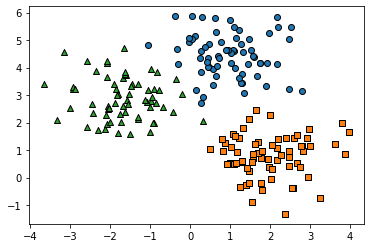

In [6]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
               marker=markers[target])
plt.show()

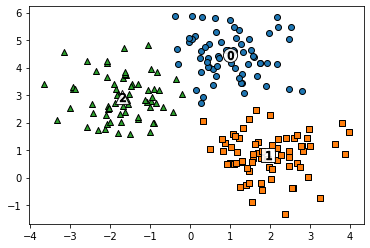

In [7]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_label = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_label

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_label)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
               marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
               alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
               edgecolor='k', marker='$%d$' % label)

In [10]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

# 거의 대부분 잘 매핑됨

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


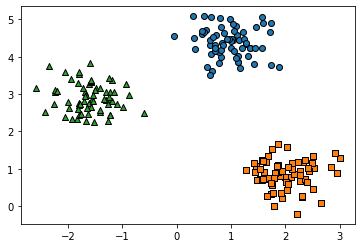

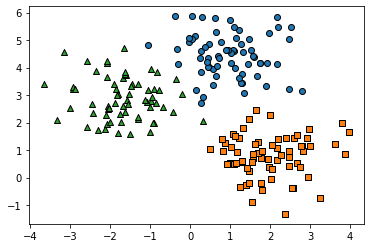

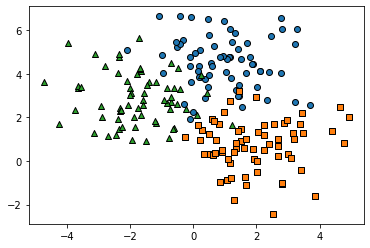

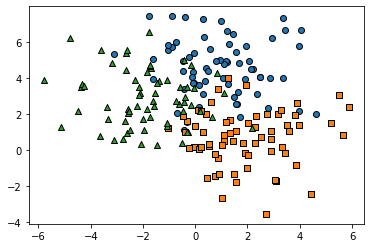

In [12]:
# make_blobs()은 cluster_std 파라미터로 데이터의 분포도 조절
# cluster_std가 작을수록 군집 중심에 데이터가 모여 있고, 클수록 데이터가 커져 있음을 알 수 있음

cluster_std_list = [0.4, 0.8, 1.2, 1.6]

for cluster_std in cluster_std_list:
    X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=cluster_std, random_state=0)
    clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
    clusterDF['target'] = y
    
    target_list = np.unique(y)

    # 각 타깃별 산점도의 마커 값
    markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

    # 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
    # target==0, target==1, target==2로 scatter plot을 marker별로 생성
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target']==target]
        plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                   marker=markers[target])
    plt.show()
